In [11]:
!pip3 install git+https://github.com/Ayesha279/benchmark-comparison.git@multiRecord_touchstone
from touchstone import __version__
from touchstone.benchmarks.generic import Benchmark
from touchstone import decision_maker
from touchstone import databases
from touchstone.utils.lib import mergedicts, flatten_and_discard
from touchstone.utils.lib import mergedicts, flatten_and_discard
from tabulate import tabulate
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

compute_header = []
uuid="aeed6306-b7e1-11eb-b313-e86a640406b2"
database="elasticsearch"
es_url="https://search-perfscale-dev-chmf5l4sh66lvxbnadi4bznl3a.us-west-2.es.amazonaws.com"
benchmark=Benchmark(open("percentileTest.json"), database)
main = {}

for compute in benchmark.compute_map['ocm-requests'] :
    conn=databases.grab(database,es_url)
    result=conn.emit_compute_dict(uuid,
                                  compute,
                                  "ocm-requests",
                                  "uuid")
    mergedicts(result,main)

  Cloning https://github.com/Ayesha279/benchmark-comparison.git (to revision multiRecord_touchstone) to /tmp/pip-req-build-0vsx0635
  Running command git clone -q https://github.com/Ayesha279/benchmark-comparison.git /tmp/pip-req-build-0vsx0635
  Running command git checkout -b multiRecord_touchstone --track origin/multiRecord_touchstone
  Switched to a new branch 'multiRecord_touchstone'
  Branch 'multiRecord_touchstone' set up to track remote branch 'multiRecord_touchstone' from 'origin'.


In [12]:
for key in compute.get("filter", []):
        compute_header.append(key.split(".keyword")[0])
for bucket in compute.get("buckets", []):
        compute_header.append(bucket.split(".keyword")[0])
for extra_h in ["key", 'uuid', "value"]:
        compute_header.append(extra_h)
        row_list = []
flatten_and_discard(main, compute_header, row_list)
print(
    tabulate(row_list, headers=compute_header, tablefmt="pretty")
)

+---------------------------+--------+------+-----------------------------+--------------------------------------+--------------------+
|         test_name         | method | code |             key             |                 uuid                 |       value        |
+---------------------------+--------+------+-----------------------------+--------------------------------------+--------------------+
|       access-review       |  POST  | 200  |       avg(latency_ns)       | aeed6306-b7e1-11eb-b313-e86a640406b2 | 77262845.49638334  |
|       access-review       |  POST  | 200  | 90.0percentiles(latency_ns) | aeed6306-b7e1-11eb-b313-e86a640406b2 | 83204801.20827186  |
|       access-review       |  POST  | 200  | 95.0percentiles(latency_ns) | aeed6306-b7e1-11eb-b313-e86a640406b2 | 84977037.94744503  |
|       access-review       |  POST  | 200  | 99.0percentiles(latency_ns) | aeed6306-b7e1-11eb-b313-e86a640406b2 | 95605691.61849725  |
| register-existing-cluster |  POST  | 200  |   

In [13]:
df1 =pd.DataFrame.from_records(
    [
        (level1, level2, level3, level4, level5, level6, level7, level8, leaf)
        for level1, level2_dict in result.items()
        for level2, level3_dict in level2_dict.items()
        for level3, level4_dict in level3_dict.items()
        for level4, level5_dict in level4_dict.items()
        for level5, level6_dict in level5_dict.items()
        for level6, level7_dict in level6_dict.items()
        for level7, level8_dict in level7_dict.items()
        for level8, leaf in level8_dict.items()
    ],
    columns=['type1', 'test_name', 'type2', 'Method', 'type3','Code', 'KEY', 'UUID', 'Latency']
)
df1 =df1.drop(columns=['type1', 'type2', 'type3'])
print(df1)

                    test_name Method  Code                          KEY  \
0               access-review   POST   200              avg(latency_ns)   
1               access-review   POST   200  90.0percentiles(latency_ns)   
2               access-review   POST   200  95.0percentiles(latency_ns)   
3               access-review   POST   200  99.0percentiles(latency_ns)   
4   register-existing-cluster   POST   200              avg(latency_ns)   
..                        ...    ...   ...                          ...   
75             create-cluster   POST     0  99.0percentiles(latency_ns)   
76             create-cluster   POST   400              avg(latency_ns)   
77             create-cluster   POST   400  90.0percentiles(latency_ns)   
78             create-cluster   POST   400  95.0percentiles(latency_ns)   
79             create-cluster   POST   400  99.0percentiles(latency_ns)   

                                    UUID       Latency  
0   aeed6306-b7e1-11eb-b313-e86a640406b2  

<AxesSubplot:title={'center':'Latency Test Avrage'}, xlabel='test_name', ylabel='Mean Latency'>

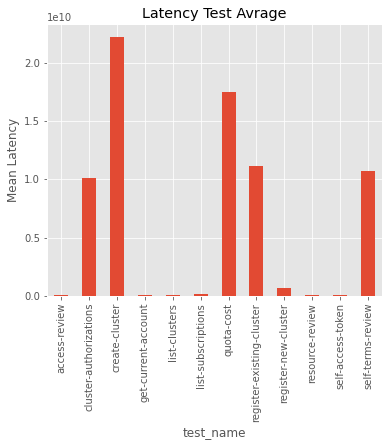

In [14]:
TestAvg= df1.groupby(['test_name'])['Latency'].mean()

TestAvg.plot(kind='bar', title='Latency Test Avrage', ylabel='Mean Latency',
         xlabel='test_name', figsize=(6, 5))

<AxesSubplot:title={'center':'Latency Test Avrage'}, xlabel='test_name', ylabel='Mean Latency'>

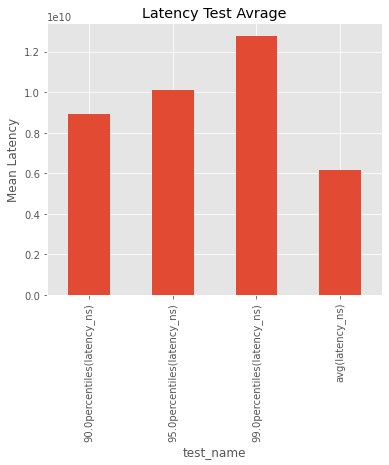

In [15]:
x= df1.groupby(['KEY'])['Latency'].mean()

x.plot(kind='bar', title='Latency Test Avrage', ylabel='Mean Latency',
         xlabel='test_name', figsize=(6, 5))